In [ ]:
# using csv file as input


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

%matplotlib inline

In [6]:
# Read the input file and view few records
deliver= pd.read_csv('deliver_fleet_data.csv')
deliver.head()

Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24                28
1  3423313212             52.53                25
2  3423313724             64.54                27
3  3423311373             55.69                22
4  3423310999             54.58                25

In [7]:
from sklearn.cluster import KMeans

In [8]:
deliver.columns

Index(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'], dtype='object')

In [9]:
deliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [10]:
X=deliver[['Distance_Feature','Speeding_Feature']]
X.head(5)

Distance_Feature  Speeding_Feature
0             71.24                28
1             52.53                25
2             64.54                27
3             55.69                22
4             54.58                25

In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
deliver_s=scalar.fit_transform(X)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(deliver_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[-0.48678423 -0.40249736]
 [ 1.95263225 -0.0139714 ]
 [-0.47952334  1.57909169]
 [ 1.90400473  4.34582367]]
[2 2 2 ... 1 1 1]


In [16]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(deliver_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[-0.48707569 -0.34543211]
 [ 1.95279463 -0.01664897]
 [ 0.14575993  2.51698215]]
[2 0 2 ... 1 1 1]


In [17]:
## Elbow test
cluster_range = range(1,20)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(deliver_s)
    cluster_errors.append(clusters.inertia_)

In [18]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

num_clusters  cluster_errors
0             1     8000.000000
1             2     3911.926390
2             3     1756.544582
3             4      739.153451
4             5      619.403759
5             6      502.036855
6             7      437.878070
7             8      374.586874
8             9      337.233984
9            10      308.231643

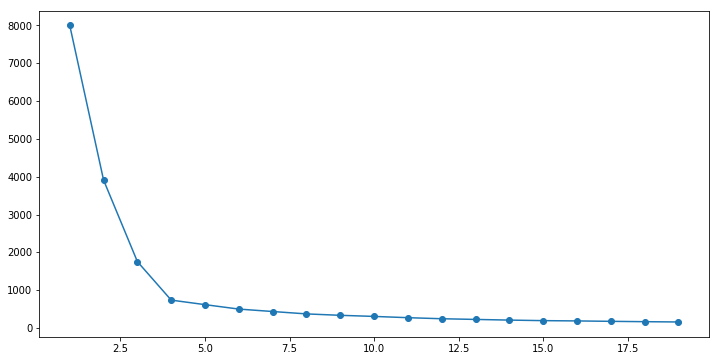

In [19]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=5,random_state=0).fit(deliver_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[-0.47765046  2.08388124]
 [-0.48655941 -0.40871747]
 [ 1.95263225 -0.0139714 ]
 [ 1.90400473  4.34582367]
 [-0.48465243  0.99416329]]
[4 4 4 ... 2 2 2]


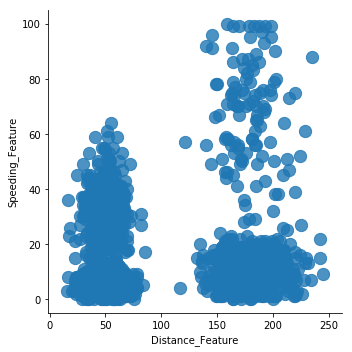

In [26]:
sn.lmplot('Distance_Feature','Speeding_Feature',data=X,fit_reg=False,scatter_kws={"s":150})